<a href="https://www.kaggle.com/code/kamalapousajja/udemy-courses-analysis-basic-eda?scriptVersionId=126949169" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Udemy Courses Analysis

The dataset contains Udemy courses information, including titles, category (subject), price, number of reviews, and subscribers.

Key Finding for this analysis:

- Percentage of courses by subjects
- Percentage of courses by levels
- Level distribution by Subjects
- Total number of paid course and free course
- Compare the prices by subjects
- Duration distribution between paid courses and free courses
- Duration distribution between subjects
- Number of subscribers by Subjects
- Number of reviews by Subjects
- Top 10 Most popular courses by number of subscribers
- Top 10 Most popular courses by number of reviews
- The most popular words used for course title (Word cloud of course titles)
- Relation between price and number of subscribers
- Relation between price and number of reviews
- Relation between price and content duration
- Relation between content duration and number of reviews
- Relation between content duration and number of subscribers
- Relation between number of reviews and number of subscribers
- The heat map depicts the correlation




# Import Libraries and Read Data

In [1]:
#Import Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [2]:
#Read the Dataset

df = pd.read_csv('/kaggle/input/udemy-courses/udemy_courses.csv')

In [3]:
#Get information about dataset

df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [4]:
df.shape

(3678, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


# Data Cleansing

In [6]:
#Change data type of 'published_timestamp' from object to datetime

df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

In [7]:
df.dtypes

course_id                            int64
course_title                        object
url                                 object
is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

In [8]:
#Check for missing data

df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [9]:
#Check for duplicate data

df.duplicated().sum()

6

In [10]:
df[df.duplicated()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16 18:28:30+00:00,Business Finance
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23 16:19:01+00:00,Business Finance
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15 14:56:17+00:00,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02 14:29:35+00:00,Business Finance
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15 21:48:55+00:00,Graphic Design
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03 00:55:31+00:00,Web Development


In [11]:
#Remove duplicate

df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(3672, 12)

In [14]:
#Check for number of lecture = 0

df['num_lectures'].unique()

array([ 51, 274,  36,  26,  25,  23,  38,  15,  76,  17,  19,  16,  42,
        52,  12,  39,  40,  50,  81,  37,  41,  35,  80,  22,  28,  68,
        61, 138, 110, 174, 103,  79, 227,  43,  46,  62,  53,  77,  20,
        47,  33,  11, 102,  45,  32,  30,  18,  60,  54,  24, 134,   5,
        10,  49,  14,   6, 108,  57,   9,  13,   8, 462,  29,  59, 284,
        55,  34,  31, 544,  66,  21,  88,  44,  27,  48,  90,   7,  97,
       128,  63, 235, 211, 100,  82, 123, 332, 272,  69, 129, 316,  70,
       105, 176,  91,  64,  72,   4,  58, 142, 395, 194, 527,  74,  84,
        87,  65, 460, 101,  95, 107, 113,  71, 145,  75, 444,   0, 127,
        98, 286, 120, 130,  73, 121,  56, 158, 241,  86, 187, 111,  85,
       150,  96,  94, 119,  78, 122, 124, 163, 131,  67, 141, 118, 166,
       154, 185, 207, 225, 202, 115, 156,  83,  99, 196, 162,  89, 362,
       136, 310, 104, 291, 144, 161, 224, 240, 183, 192, 309, 215, 106,
       321, 151,  92, 126, 112,  93, 125, 348, 402, 135, 171, 21

In [15]:
#Check for number of lecture = 0

df[df['num_lectures']==0]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
892,627332,Mutual Funds for Investors in Retirement Accounts,https://www.udemy.com/mutual-funds-for-investo...,True,20,0,0,0,All Levels,0.0,2015-12-17 05:38:38+00:00,Business Finance


In [16]:
#Remove the row that had number of lecture = 0

df.drop([892], inplace = True)

In [17]:
#Check for number of lecture = 0 Again

df[df['num_lectures']==0]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject


In [18]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance


In [19]:
#Remove unnecessary column

df.drop(['course_id','url', 'num_lectures'], axis=1, inplace=True)

df.head()

,course_title,is_paid,price,num_subscribers,num_reviews,level,content_duration,published_timestamp,subject
0,Ultimate Investment Banking Course,True,200,2147,23,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,How To Maximize Your Profits Trading Options,True,200,1276,45,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance


# Analysis and Visualisation

# Percentage of Courses by Subjects

In [20]:
#Count for total number of each course

df['subject'].value_counts()

Web Development        1199
Business Finance       1190
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

In [21]:
course_df = df['subject'].value_counts().reset_index()

fig = go.Figure(data=[go.Pie(labels=course_df['index'],
                             values=course_df['subject'],
                             hole=.7,
                             title = 'Course Subjects')])

fig.update_layout(title='Percentage of Courses by Subjects', font_size=15)
fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()


Most of subjects are Web Development 32.7% and Business Finance 32.4%

# Percentage of total number by Levels

In [22]:
#Count for total number of each level

df['level'].value_counts()

All Levels            1924
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

In [23]:
level_df = df['level'].value_counts().reset_index()

fig = go.Figure(data=[go.Pie(labels=level_df['index'],
                             values=level_df['level'],
                             hole=.7,
                             title = 'Course Levels')])

fig.update_layout(title='Percentage of total number by Levels', font_size=15)
fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()


Most of courses are for all levels (52.2%) and seconly are for beginner level (34.5%)

# Level distribution By Subjects

In [24]:
#Create a new data frame to group by Level and Subjects

df2 = df.groupby(['subject', 'level']).count()
df2

course_title  is_paid  price  \
subject             level                                              
Business Finance    All Levels                   692      692    692   
                    Beginner Level               339      339    339   
                    Expert Level                  31       31     31   
                    Intermediate Level           128      128    128   
Graphic Design      All Levels                   298      298    298   
                    Beginner Level               242      242    242   
                    Expert Level                   5        5      5   
                    Intermediate Level            57       57     57   
Musical Instruments All Levels                   276      276    276   
                    Beginner Level               296      296    296   
                    Expert Level                   7        7      7   
                    Intermediate Level           101      101    101   
Web Development     All Levels                   658      658    658   
                    Beginner Level               391      391    391   
                    Expert Level                  15       15     15   
                    Intermediate Level           135      135    135   

                                        num_subscribers  num_reviews  \
subject             level                                              
Business Finance    All Levels                      692          692   
                    Beginner Level                  339          339   
                    Expert Level                     31           31   
                    Intermediate Level              128          128   
Graphic Design      All Levels                      298          298   
                    Beginner Level                  242          242   
                    Expert Level                      5            5   
                    Intermediate Level               57           57   
Musical Instruments All Levels                      276          276   
                    Beginner Level                  296          296   
                    Expert Level                      7            7   
                    Intermediate Level              101          101   
Web Development     All Levels                      658          658   
                    Beginner Level                  391          391   
                    Expert Level                     15           15   
                    Intermediate Level              135          135   

                                        content_duration  published_timestamp  
subject             level                                                      
Business Finance    All Levels                       692                  692  
                    Beginner Level                   339                  339  
                    Expert Level                      31                   31  
                    Intermediate Level               128                  128  
Graphic Design      All Levels                       298                  298  
                    Beginner Level                   242                  242  
                    Expert Level                       5                    5  
                    Intermediate Level                57                   57  
Musical Instruments All Levels                       276                  276  
                    Beginner Level                   296                  296  
                    Expert Level                       7                    7  
                    Intermediate Level               101                  101  
Web Development     All Levels                       658                  658  
                    Beginner Level                   391                  391  
                    Expert Level                      15                   15  
                    Intermediate Level               135                  135

In [25]:
df2 = df.groupby(['subject', 'level'],as_index=False).count()
df2 

,subject,level,course_title,is_paid,price,num_subscribers,num_reviews,content_duration,published_timestamp
0,Business Finance,All Levels,692,692,692,692,692,692,692
1,Business Finance,Beginner Level,339,339,339,339,339,339,339
2,Business Finance,Expert Level,31,31,31,31,31,31,31
3,Business Finance,Intermediate Level,128,128,128,128,128,128,128
4,Graphic Design,All Levels,298,298,298,298,298,298,298
5,Graphic Design,Beginner Level,242,242,242,242,242,242,242
6,Graphic Design,Expert Level,5,5,5,5,5,5,5
7,Graphic Design,Intermediate Level,57,57,57,57,57,57,57
8,Musical Instruments,All Levels,276,276,276,276,276,276,276
9,Musical Instruments,Beginner Level,296,296,296,296,296,296,296


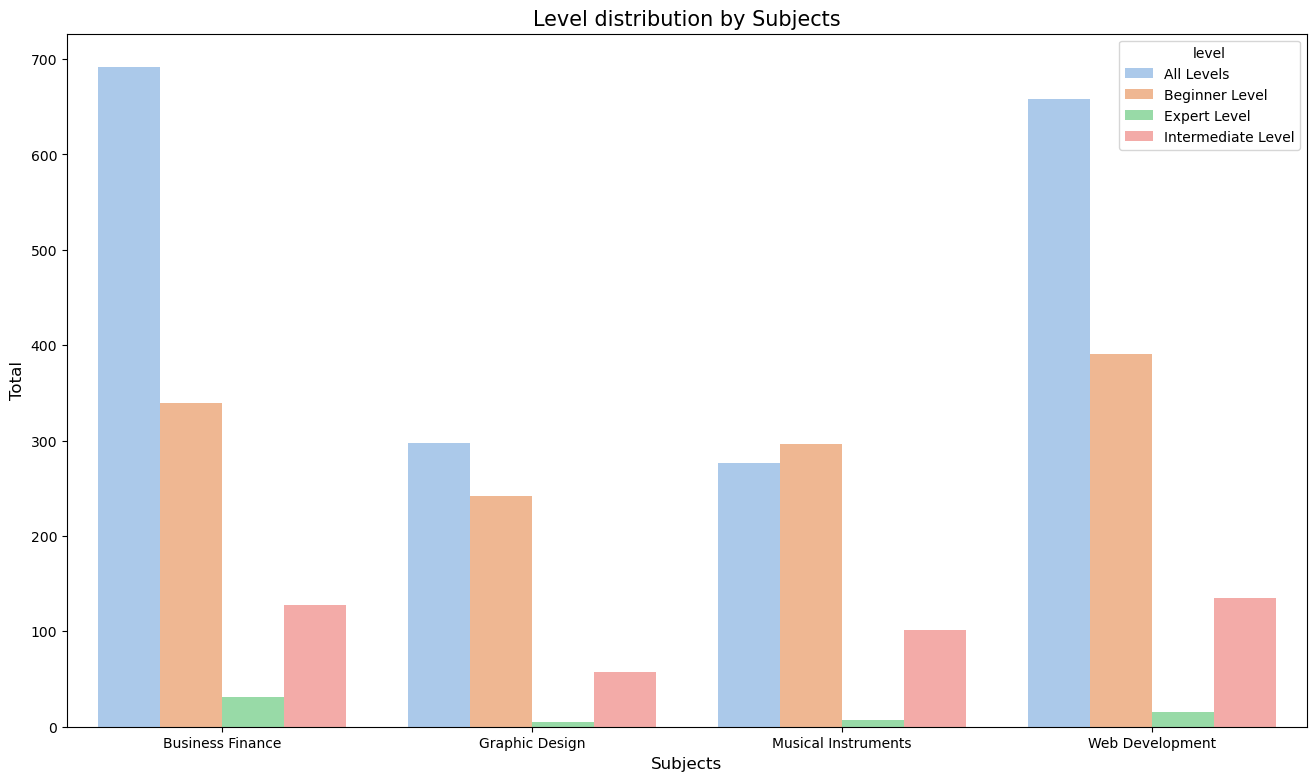

In [26]:
plt.figure(figsize=(16,9))
sns.barplot(data=df2,
            x='subject',
            y='price',
            hue='level',
            palette='pastel')
            
plt.title('Level distribution by Subjects', fontsize=15)
plt.ylabel('Total',fontsize =12)
plt.xlabel('Subjects',fontsize =12)

plt.show()

Business Finance, Graphic Design and Web Development are mostly for All Levels. While the Musical Instruments subject is for Beginner Level. And Expert Level is the lowerest number of every Subjects.

# Total number of Paid course and Free course

In [27]:
#Find the total number of Paid course and Free course

df["is_paid"].value_counts()

True     3361
False     310
Name: is_paid, dtype: int64

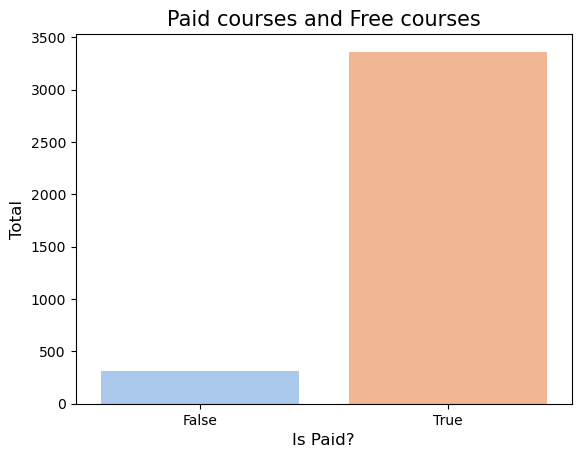

In [28]:
sns.countplot(x='is_paid',data=df,palette='pastel')

plt.title("Paid courses and Free courses", fontsize=15)
plt.ylabel('Total',fontsize =12)
plt.xlabel('Is Paid?',fontsize =12)

plt.show()

Most of the courses are paid.

# Compare the Prices by Subjects

In [29]:
#Find the total Prices by Subjects

fig = px.box(df,
      x = 'subject',
      y = 'price',
      color = 'subject'
      )

fig.update_layout(showlegend=False)
fig.update_yaxes(range=[0,220], title='Prices')
fig.update_xaxes(title='Subjects')
fig.update_layout(title_text='Compare the Prices by Subjects', title_x=0.5)
fig.show()

The Price Range of Business Finance and Web Development has very high Range. The Musical Instruments are the lowest price. The median of the price around $30-50.

# Duration Distribution between Paid Courses and Free Courses

In [30]:
fig = px.box(df,
    x='content_duration',
    y='is_paid',
    orientation='h',
    color='is_paid'
    )

fig.update_layout(showlegend=False)
fig.update_xaxes(title='Content Durations')
fig.update_yaxes(title='Paid Courses')
fig.update_layout(title_text='Duration Distribution between Paid Courses and Free Courses', title_x=0.5)
fig.show()

Paid courses have a longer duration, with an average of 2.5 hours. Free courses have a median of 1.5 hours. Paid courses have the longest course duration at 78.5 hours, whereas the free course have the longest duration at only 21 hours.

# Duration Distribution between Subjects

In [31]:
fig=px.box(df,
          x='content_duration',
          y='subject',
          orientation='h',
          color='is_paid'
          )

fig.update_layout(showlegend=True)
fig.update_xaxes(title='Content Duration')
fig.update_yaxes(title='Subjects')
fig.update_layout(title_text='Duration Distribution between Subjects', title_x=0.5)
fig.show()

The subjects of Musical Instruments have less content duration in both paid courses and free courses. Web development have the high range of contaent duration in both paid courses and free courses.

# Total number of Reviews by Subjects

In [32]:
#Find the total nuber of reviews groub by subjects

review_df = df.groupby('subject')['num_reviews'].sum().sort_values(ascending=False).reset_index()

review_df

,subject,num_reviews
0,Web Development,429500
1,Business Finance,75902
2,Graphic Design,37070
3,Musical Instruments,31724


In [33]:
fig = px.sunburst(review_df, 
                  path=['subject'], 
                  values='num_reviews'
                  )

fig.update_traces(textinfo='label+percent parent')    
fig.update_layout(title_text='Total number of reviews by Subjects', title_x=0.5)
fig.show()

Web development has the highest total number of reviews (429,500 reviews).

# Total number of Subscribers by Subjects

In [34]:
subscriber_df = df.groupby('subject')['num_subscribers'].sum().sort_values(ascending=False).reset_index()

subscriber_df

,subject,num_subscribers
0,Web Development,7937287
1,Business Finance,1868711
2,Graphic Design,1063148
3,Musical Instruments,846689


In [35]:
fig = px.sunburst(subscriber_df, 
                  path=['subject'], 
                  values='num_subscribers'
                  )

fig.update_traces(textinfo='label+percent parent')    
fig.update_layout(title_text='Total number of Subscribers by Subjects', title_x=0.5)
fig.show()

Web development has the highest total number of Subscribers (7,937,287 Subscribers).

# Number of Reviews and Number of Subscribers by Subjects

In [36]:
plt.figure(figsize=(16,9))

fig = px.scatter(df, 
                 x='num_reviews', 
                 y='num_subscribers',
                 size='num_subscribers', 
                 color='subject',
                 log_x=True, 
                 size_max=50
                 )

fig.update_layout(showlegend=True)
fig.update_xaxes(title='Number of Reviews')
fig.update_yaxes(title='Number of Subscribers')
fig.update_layout(title_text='Number of Reviews and Number of Subscribers by Subjects', title_x=0.5)
fig.show()

<Figure size 1600x900 with 0 Axes>

The majority of Reviews is Highest for Web Development and has a high number of Subscribers.

Many people Reviewed a course without Subscribe.

# Top 10 Most Popular Courses By Number of Subscribers

In [37]:
Top_subscribe_df = df[['course_title','num_subscribers']].sort_values('num_subscribers',ascending = False).head(10)
Top_subscribe_df

,course_title,num_subscribers
2827,Learn HTML5 Programming From Scratch,268923
3032,Coding for Entrepreneurs Basic,161029
3230,The Web Developer Bootcamp,121584
2783,Build Your First Website in 1 Week with HTML5 ...,120291
3232,The Complete Web Developer Course 2.0,114512
1896,Free Beginner Electric Guitar Lessons,101154
2589,Web Design for Web Developers: Build Beautiful...,98867
2619,Learn Javascript & JQuery From Scratch,84897
3289,Practical PHP: Master the Basics and Code Dyna...,83737
3247,JavaScript: Understanding the Weird Parts,79612


Text(0.5, 1.0, 'Top 10 Most Popular Courses By Number of Subscribers')

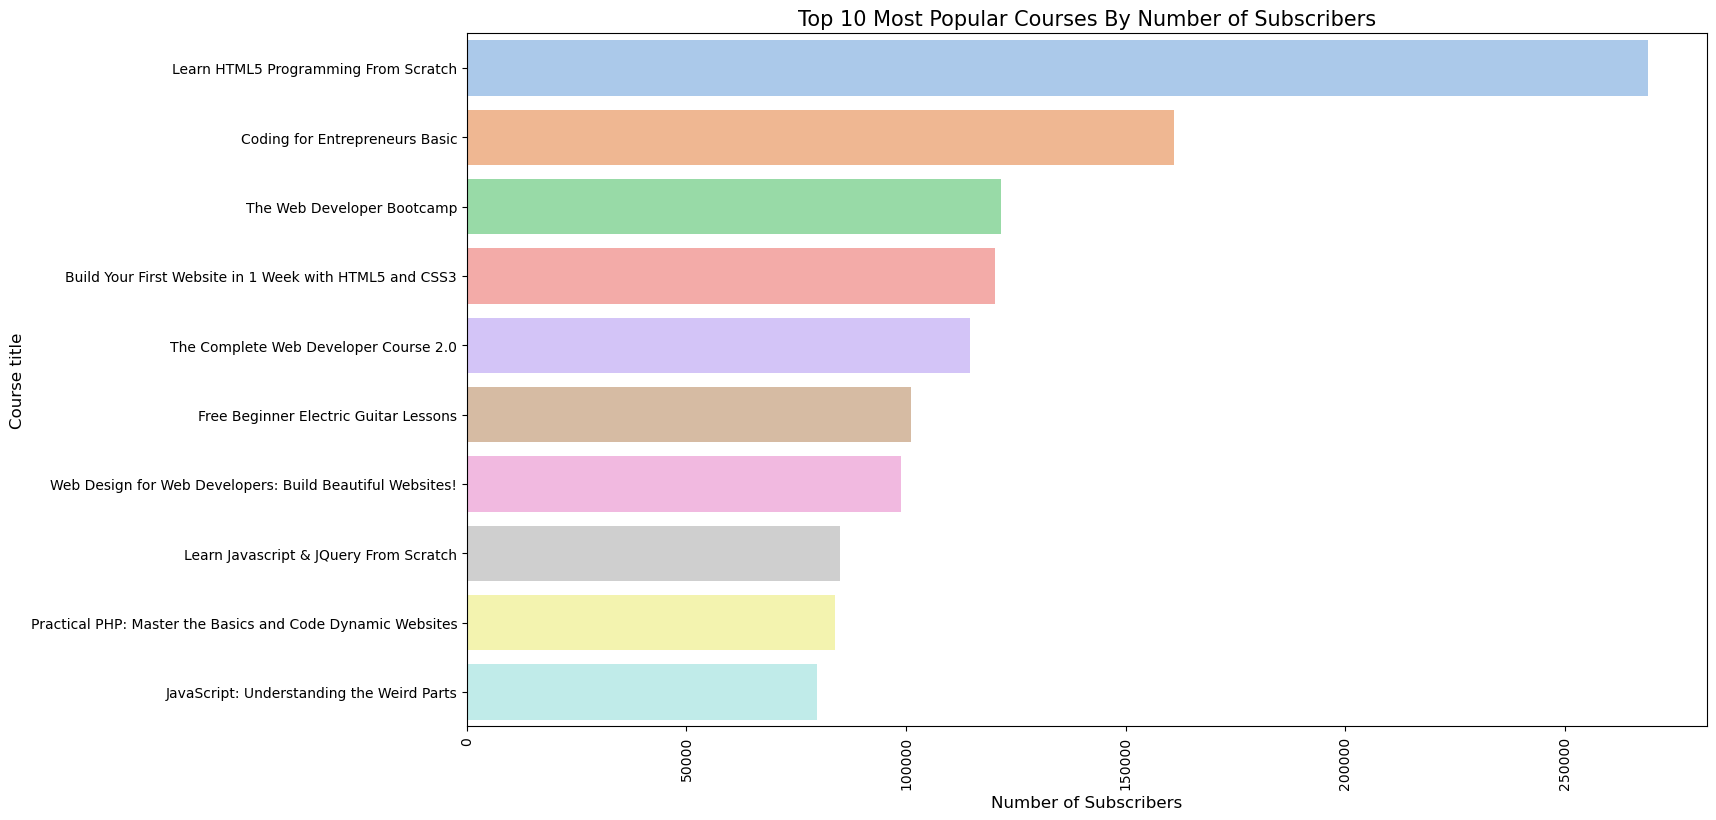

In [38]:
plt.figure(figsize=(16,9))

sns.barplot(Top_subscribe_df, 
            x = 'num_subscribers', 
            y = 'course_title', 
            palette = 'pastel'
            )

plt.xticks(rotation = 90)
plt.xlabel('Number of Subscribers', fontsize = 12)
plt.ylabel('Course title', fontsize = 12)
plt.title('Top 10 Most Popular Courses By Number of Subscribers', fontsize =15)

Course tilte 'Learn HTML5 Programming From Scratch' has the highest number of subscribers. (268,923 subscribers)

# Top 10 Most Popular Courses By Number of Reviews

In [39]:
Top_review_df = df[['course_title','num_reviews']].sort_values('num_reviews',ascending = False).head(10)
Top_review_df

,course_title,num_reviews
3230,The Web Developer Bootcamp,27445
3232,The Complete Web Developer Course 2.0,22412
3204,Angular 4 (formerly Angular 2) - The Complete ...,19649
3247,JavaScript: Understanding the Weird Parts,16976
3254,Modern React with Redux,15117
3246,Learn and Understand AngularJS,11580
3251,Learn and Understand NodeJS,11123
2827,Learn HTML5 Programming From Scratch,8629
3228,Angular 2 with TypeScript for Beginners: The P...,8341
1979,Pianoforall - Incredible New Way To Learn Pian...,7676


Text(0.5, 1.0, 'Top 10 Most Popular Courses By Number of Reviews')

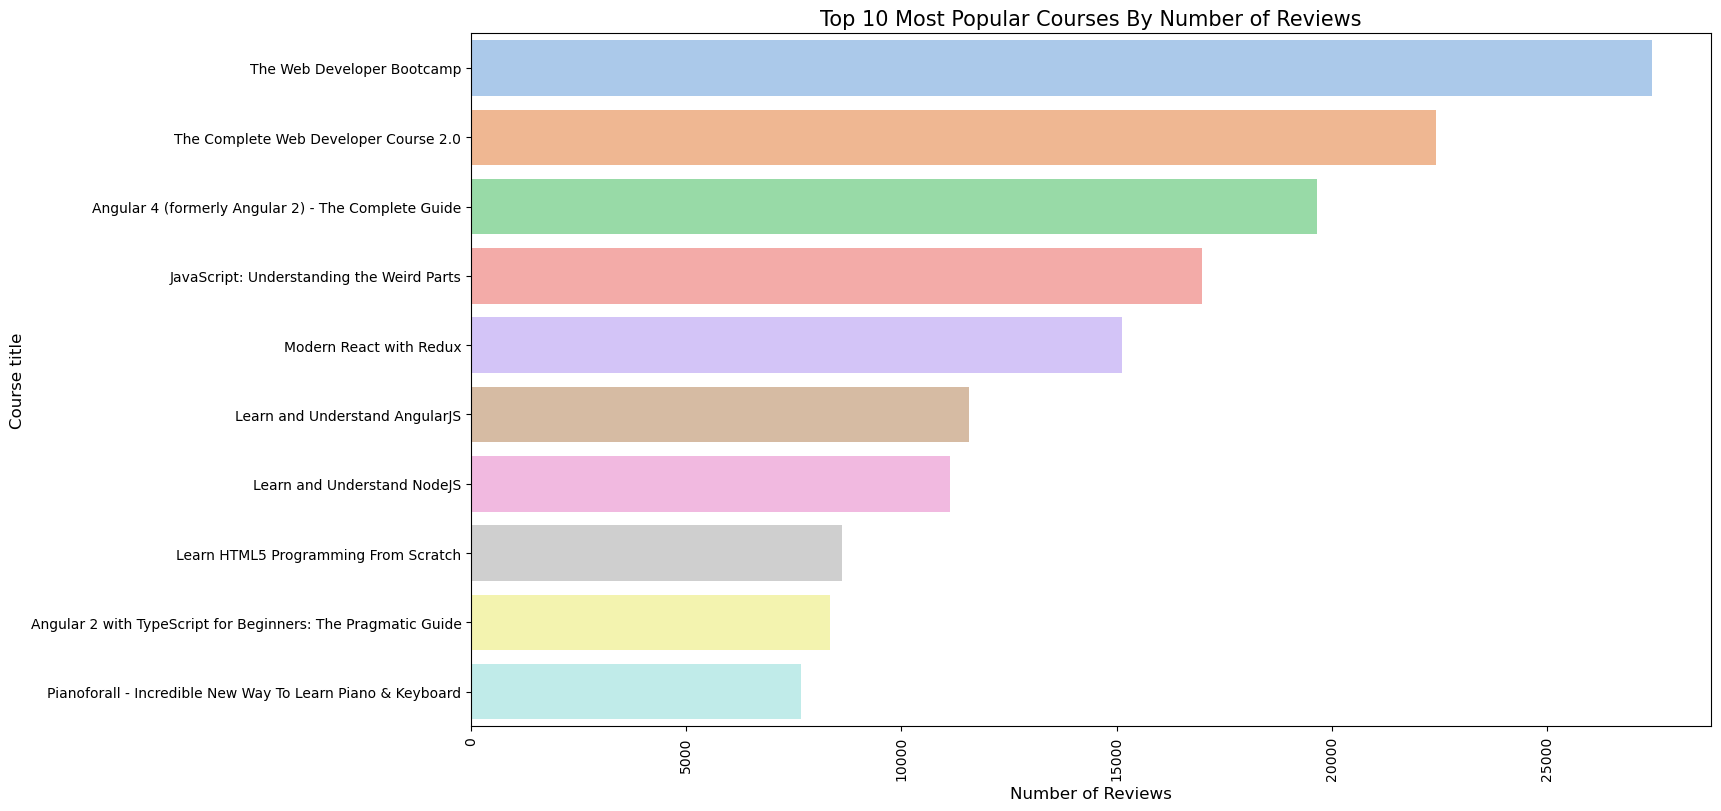

In [40]:
plt.figure(figsize = (16,9))

sns.barplot(Top_review_df, 
            x = 'num_reviews', 
            y = 'course_title', 
            palette = 'pastel'
            )

plt.xticks(rotation = 90)
plt.xlabel('Number of Reviews', fontsize = 12)
plt.ylabel('Course title', fontsize = 12)
plt.title('Top 10 Most Popular Courses By Number of Reviews', fontsize = 15)

Course title 'The Web Developer Bootcamp' has the highest number of reviews (27,445 reviews).

# Word Cloud of Course Titles

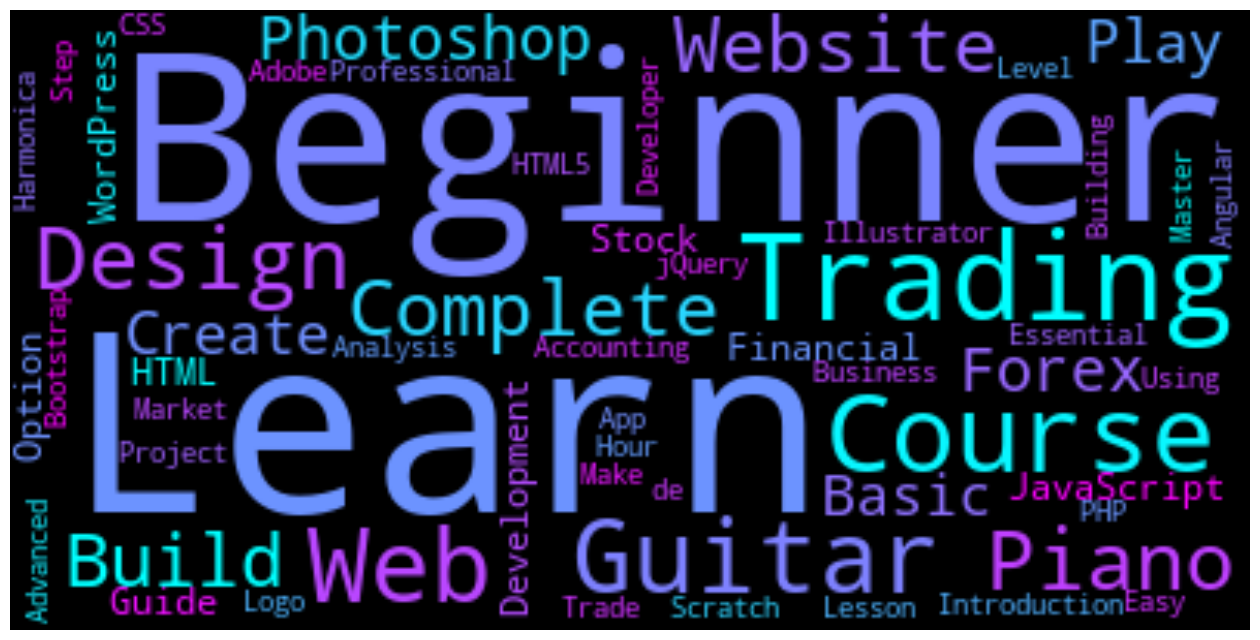

In [41]:
from wordcloud import WordCloud 

plt.figure(figsize = (16,9))

text = ' '.join(subject_titles for subject_titles in df['course_title'])

word_cloud = WordCloud(collocations = False,
                       background_color='black', 
                       colormap = 'cool_r', 
                       min_font_size = 8).generate(text)

plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

The most popular words used for Course Title are 'Beginner', 'Learn' , 'Trading' and 'Course'

# Relation between Prices and Number of Subscribers

Text(0.5, 1.0, 'Relation between Prices and Number of Subscribers')

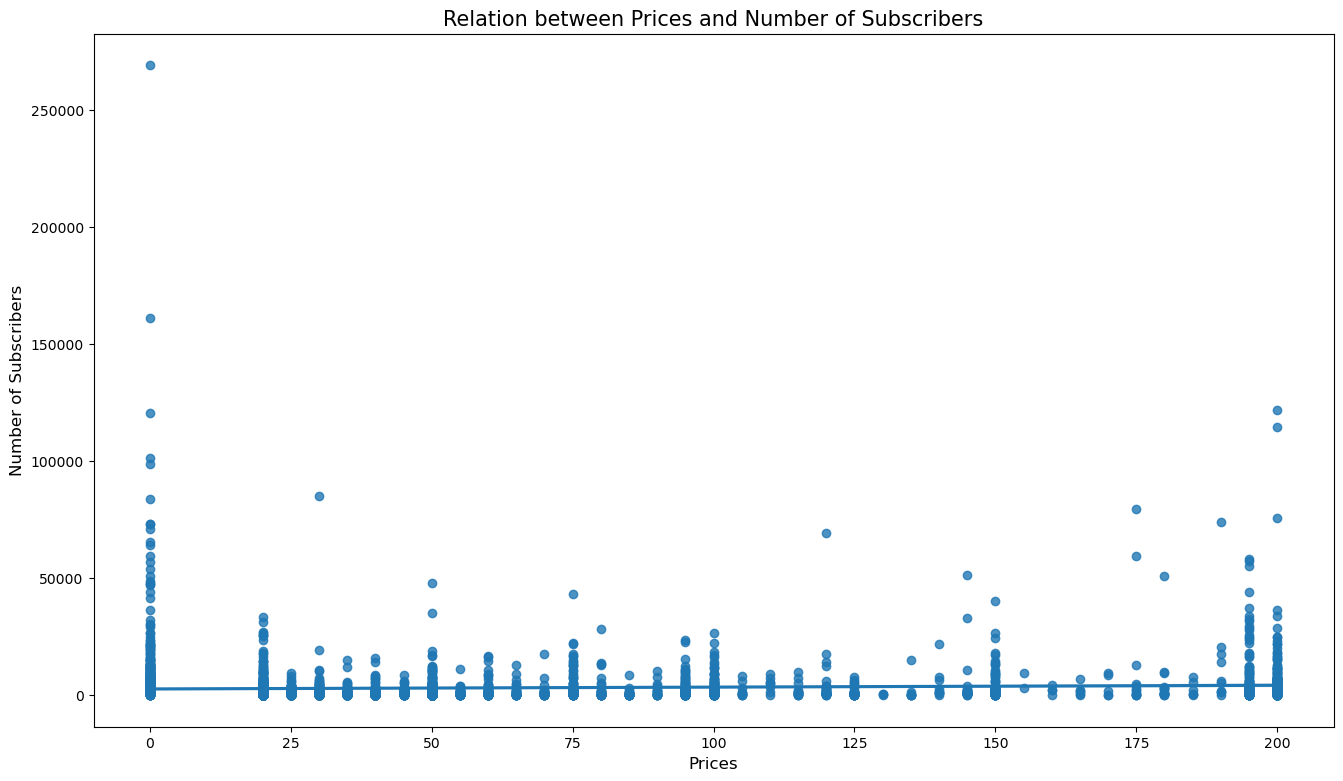

In [42]:
plt.figure(figsize=(16,9))

sns.regplot(x='price', y='num_subscribers', data=df)

plt.xlabel('Prices', fontsize = 12)
plt.ylabel('Number of Subscribers', fontsize = 12)
plt.title('Relation between Prices and Number of Subscribers',fontsize = 15)

There is no relation between prices and number of subscribers. Price does not affect the number of subscribers. The highest number of Subscribers are from Free courses.

# Relation between Prices and Number of Reviews

Text(0.5, 1.0, 'Relation between Prices and Number of Reviews')

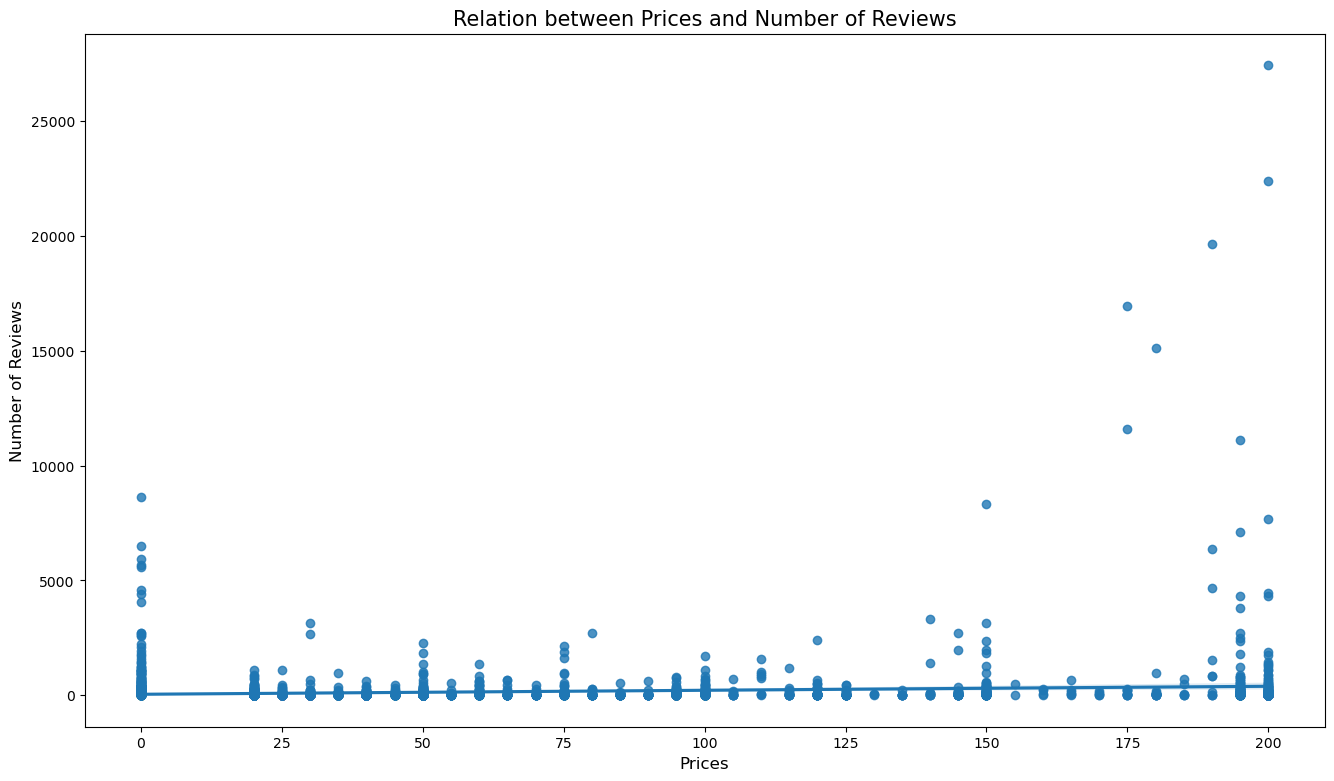

In [43]:
plt.figure(figsize=(16,9)) 

sns.regplot(x='price',y='num_reviews',data=df)

plt.xlabel('Prices', fontsize = 12)
plt.ylabel('Number of Reviews', fontsize = 12)
plt.title('Relation between Prices and Number of Reviews', fontsize = 15)

Course price does not affect the number of reviews.

# Relation between Prices and Content Duration

Text(0.5, 1.0, 'Relation between Prices and Content Duration')

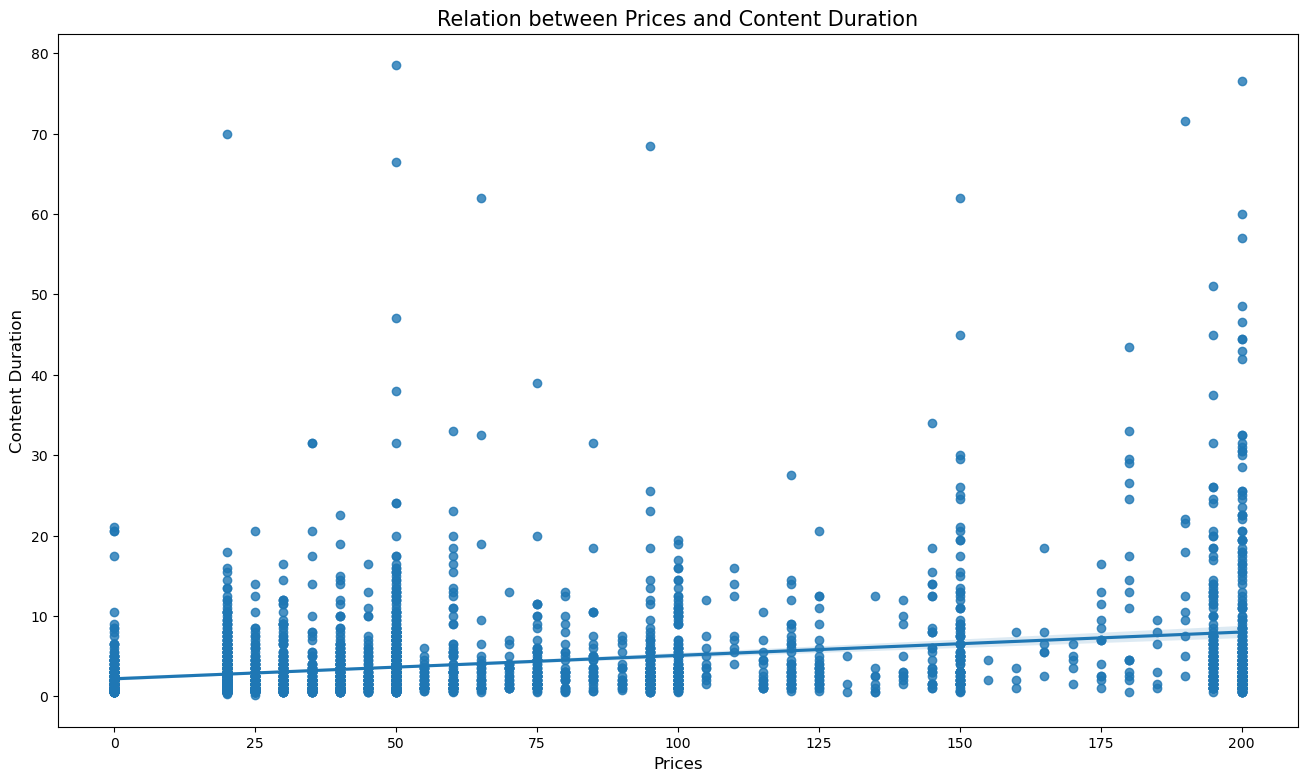

In [44]:
plt.figure(figsize=(16,9))

sns.regplot(x='price',y='content_duration',data=df)

plt.xlabel('Prices', fontsize = 12)
plt.ylabel('Content Duration', fontsize = 12)
plt.title('Relation between Prices and Content Duration', fontsize = 15)

Course duration may affect the course price. More content duration can make higher price.

# Relation between Content Duration and Number of Subscribers

Text(0.5, 1.0, 'Relation between Content Duration and Number of Subscribers')

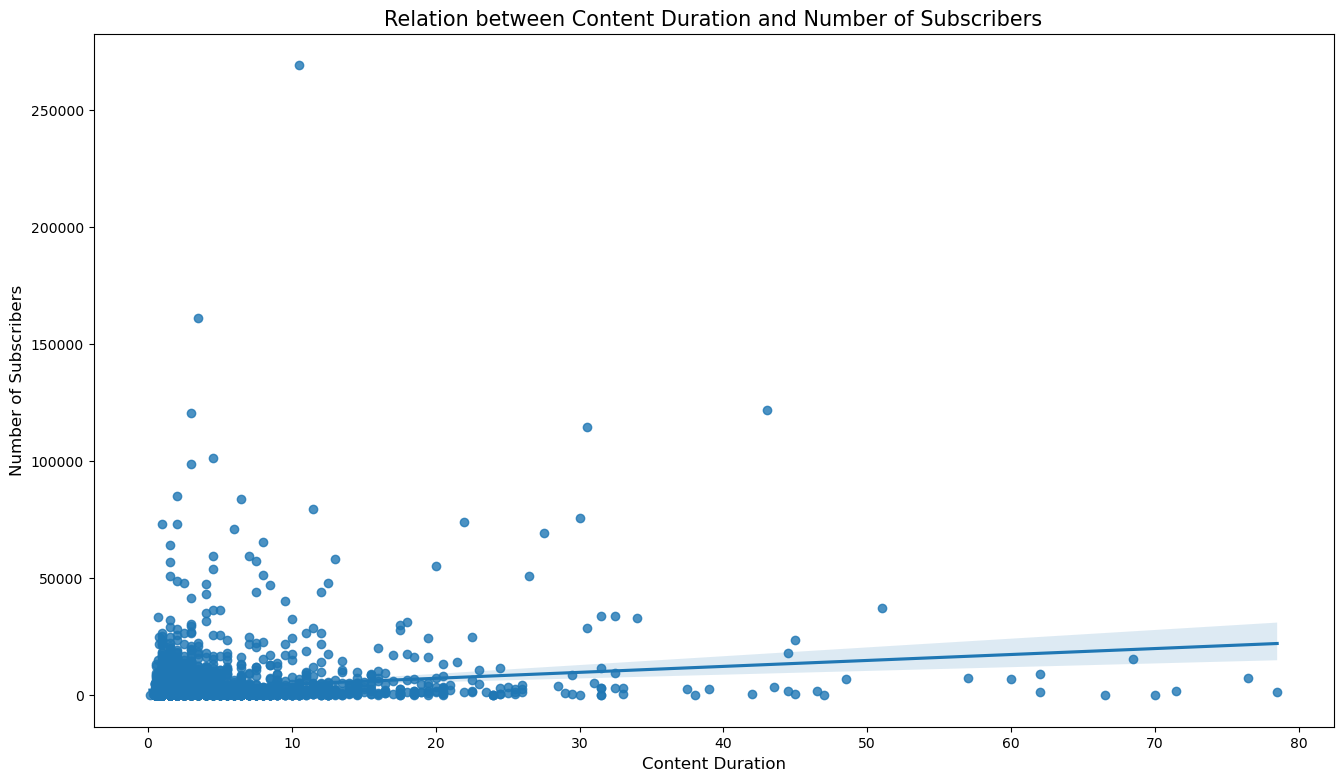

In [45]:
plt.figure(figsize=(16,9))

sns.regplot(x='content_duration', y='num_subscribers',data=df)

plt.xlabel('Content Duration', fontsize = 12)
plt.ylabel('Number of Subscribers', fontsize = 12)
plt.title('Relation between Content Duration and Number of Subscribers', fontsize = 15)

Content duration leads to more subscribers

# Relation between Content Duration and Number of Reviews

Text(0.5, 1.0, 'Relation between Content Duration and Number of Reviews')

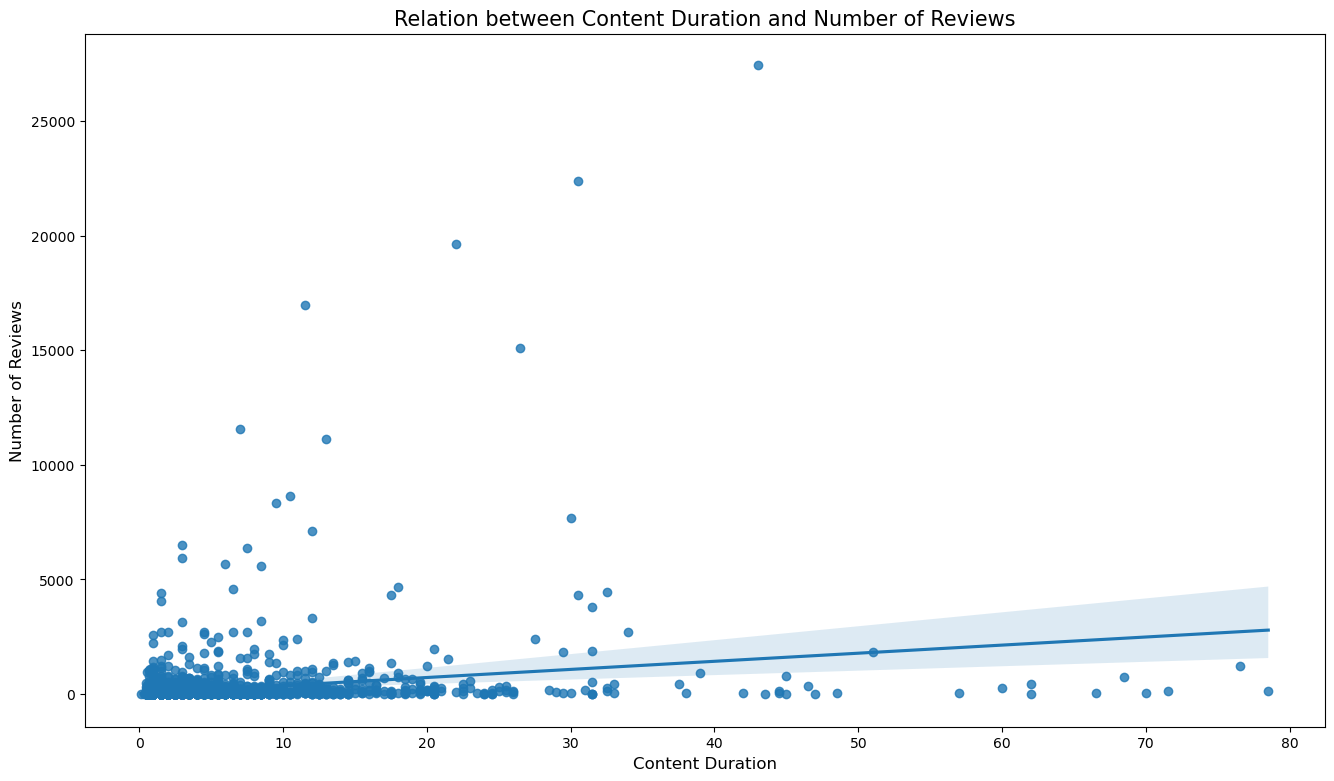

In [46]:
plt.figure(figsize=(16,9))

sns.regplot(x='content_duration', y='num_reviews',data=df)

plt.xlabel('Content Duration', fontsize = 12)
plt.ylabel('Number of Reviews', fontsize = 12)
plt.title('Relation between Content Duration and Number of Reviews', fontsize = 15)

There is more number of reviews by increasing content duration.

# Relation between Number of Subscribers and Number of Reviews

Text(0.5, 1.0, 'Relation between Number of Subscribers and Number of Reviews')

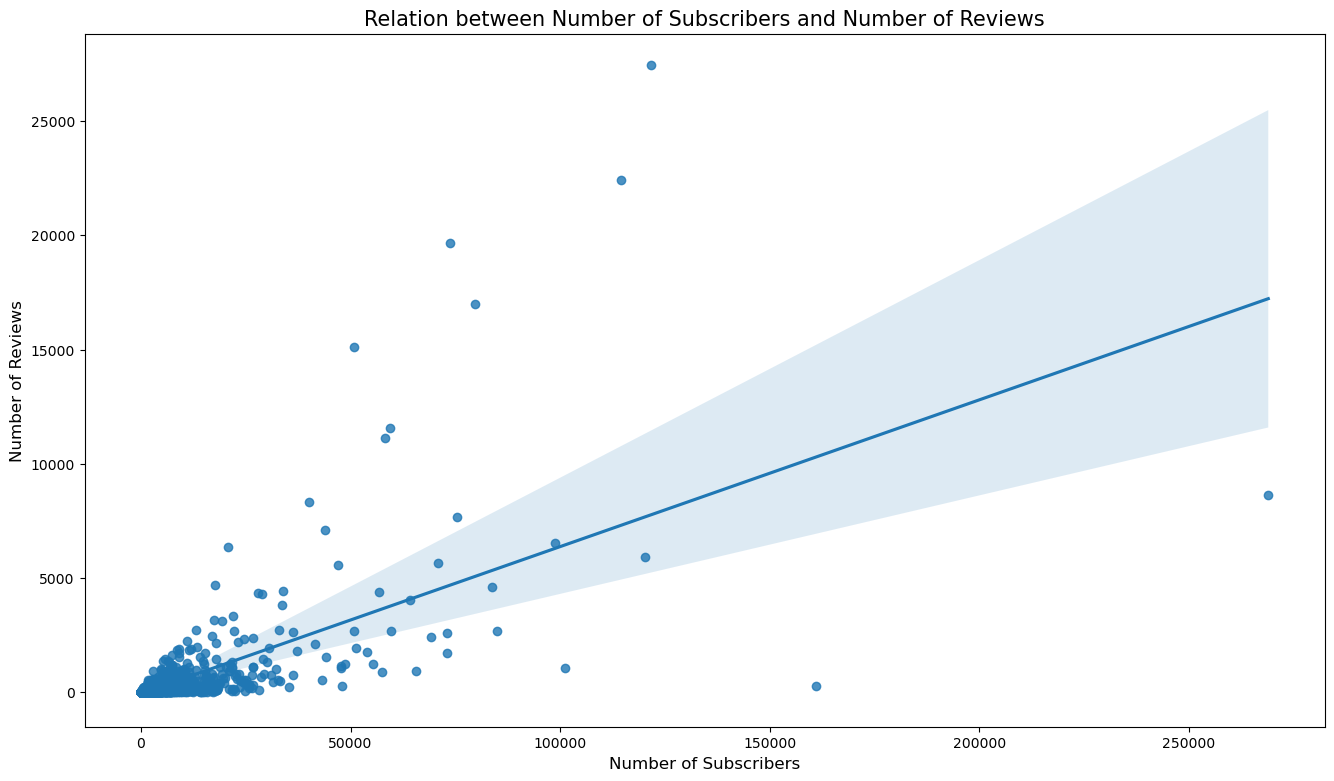

In [47]:
plt.figure(figsize=(16,9))

sns.regplot(x='num_subscribers', y='num_reviews',data=df)

plt.xlabel('Number of Subscribers', fontsize = 12)
plt.ylabel('Number of Reviews', fontsize = 12)
plt.title('Relation between Number of Subscribers and Number of Reviews', fontsize = 15)

The higher number of reviews can increase the number of subscribers.

# The heat map depicts the correlation

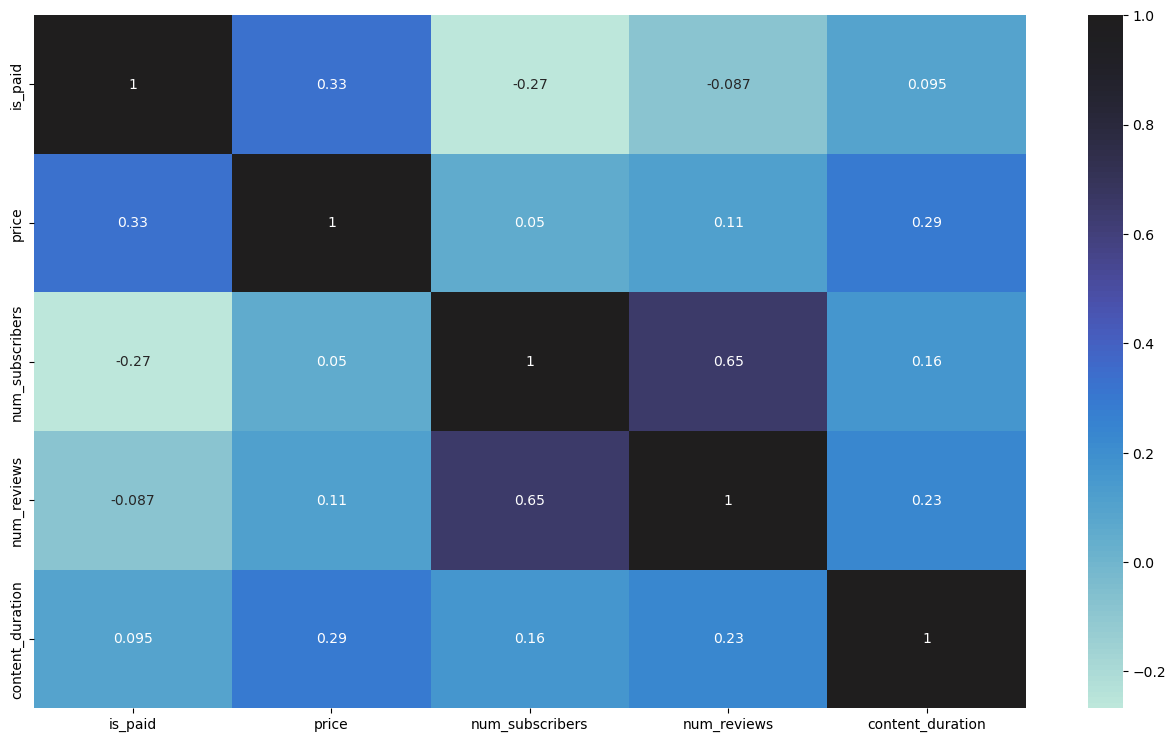

In [48]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True, center = True)
plt.show()

**Conclusions**

- Most of the courses are paid.

- Most of the courses are for all levels.

- Web develpoment has the highest number of subscribers and highest number of reviews.

- Course tilte 'Learn HTML5 Programming From Scratch' has the highest number of subscribers.

- Course title 'The Web Developer Bootcamp' has the highest number of reviews.

- The most popular words used for course title are 'Beginner', 'Learn' , 'Trading' and 'Course'.

- Price seems not to affect number of subscribers.

- Price seems not to affect number of reviews.

- Course duration leads to higher prices.

- Course duration leads to increase number of reviews.

- Course duration leads to increase number of subscribers.

- More Subscribers leads to more reviews.
